### 代码实现

In [1]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

### MNIST

In [2]:
# 设置随机数种子
torch.manual_seed(42)

# 定义数据转换方法
transform = transforms.Compose([
    transforms.ToTensor(),  # 将数据转换为张量
])

# 加载训练数据
train_dataset = datasets.MNIST(root='../data/mnist/', train=True, download=True, transform=transform)
# 实例化训练数据加载器
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
# 加载测试数据
test_dataset = datasets.MNIST(root='../data/mnist/', train=False, download=True, transform=transform)
# 实例化测试数据加载器
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

### 简单方法

In [3]:
%ls ./dataset/fruit_101/

 Apple/     banana/         grapes/         orange/
 avocado/  'chery fruit'/  'mango fruit'/   ressberry/


In [4]:
%ls ./dataset/fruit_101/orange/

'orange (101).png'  'orange (146).png'  'orange (191).png'  'orange (56).png'
'orange (102).png'  'orange (147).png'  'orange (192).png'  'orange (57).png'
'orange (103).png'  'orange (148).png'  'orange (193).png'  'orange (58).png'
'orange (104).png'  'orange (149).png'  'orange (194).png'  'orange (59).png'
'orange (105).png'  'orange (14).png'   'orange (195).png'  'orange (5).png'
'orange (106).png'  'orange (151).png'  'orange (196).png'  'orange (60).png'
'orange (107).png'  'orange (152).png'  'orange (197).png'  'orange (61).png'
'orange (108).png'  'orange (153).png'  'orange (198).png'  'orange (62).png'
'orange (109).png'  'orange (154).png'  'orange (199).png'  'orange (63).png'
'orange (10).png'   'orange (155).png'  'orange (19).png'   'orange (64).png'
'orange (110).png'  'orange (156).png'  'orange (1).png'    'orange (65).png'
'orange (111).png'  'orange (157).png'  'orange (20).png'   'orange (66).png'
'orange (112).png'  'orange (158).png'  'orange (21).png'   'oran

In [5]:
from torchvision.datasets import ImageFolder

# 定义数据转换方法
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.ToTensor(),  # 将数据转换为张量
])

# 创建图像数据集
# ImageFolder类会自动遍历指定目录下的所有子目录
# 并将每个子目录中的图像文件视为同一类别的数据
dataset = ImageFolder('./dataset/fruit_101/', transform = transform)

In [6]:
len(dataset)

1473

In [7]:
dataset.classes

['Apple',
 'avocado',
 'banana',
 'chery fruit',
 'grapes',
 'mango fruit',
 'orange',
 'ressberry']

In [8]:
dataset.class_to_idx

{'Apple': 0,
 'avocado': 1,
 'banana': 2,
 'chery fruit': 3,
 'grapes': 4,
 'mango fruit': 5,
 'orange': 6,
 'ressberry': 7}

In [9]:
# 定义绘图函数，传入dataset即可
def plot(dataset, shuffle=True):
    # 创建数据加载器
    dataloader = DataLoader(dataset, batch_size=16, shuffle=shuffle)
    
    # 取出一组数据
    images, labels = next(iter(dataloader))
    
    # 将通道维度(C)移到最后一个维度，方便使用matplotlib绘图
    images = np.transpose(images, (0, 2, 3, 1))  

    # 创建4x4的子图对象
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))

    # 遍历每个子图，绘制图像并添加子图标题
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.axis('off') # 隐藏坐标轴

        if hasattr(dataset, 'classes'): # 如果数据集有预定义的类别名称，使用该名称作为子图标题
            ax.set_title(dataset.classes[labels[i]], fontsize=12)
        else: # 否则使用类别索引作为子图标题
            ax.set_title(labels[i], fontsize=12)

    plt.show()

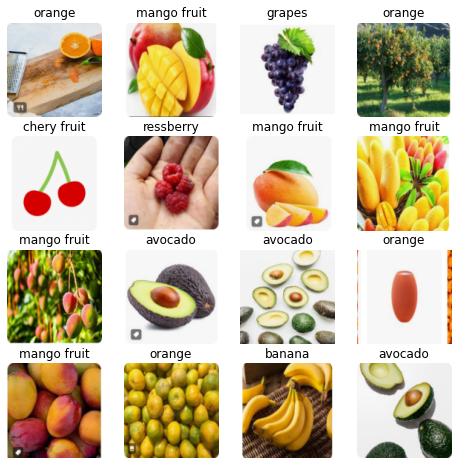

In [10]:
plot(dataset)

### 自定义数据集1

In [11]:
%ls ./dataset/flower_color/

flower_images/  flowers/


In [12]:
%ls ./dataset/flower_color/flowers/flowers/

00_001.png  02_012.png  05_004.png  07_027.png  10_023.png  16_035.png
00_002.png  02_013.png  05_005.png  07_028.png  11_001.png  16_036.png
00_003.png  02_014.png  05_006.png  07_029.png  11_002.png  16_037.png
00_004.png  02_015.png  05_007.png  07_030.png  11_003.png  16_038.png
00_005.png  02_016.png  05_008.png  07_031.png  11_004.png  16_039.png
00_006.png  02_017.png  05_009.png  07_032.png  11_005.png  16_040.png
00_007.png  02_018.png  05_010.png  07_033.png  11_006.png  16_041.png
00_008.png  02_019.png  05_011.png  07_034.png  11_007.png  16_042.png
00_009.png  02_020.png  05_012.png  07_035.png  11_008.png  16_043.png
00_010.png  02_021.png  05_013.png  08_001.png  11_009.png  16_044.png
00_011.png  02_022.png  05_014.png  08_002.png  11_010.png  16_045.png
00_012.png  02_023.png  05_015.png  08_003.png  11_011.png  16_046.png
00_013.png  02_024.png  05_016.png  08_004.png  12_001.png  16_047.png
00_014.png  02_025.png  05_017.png  08_005.png  12_002.png  17_001.png
00_015

In [13]:
import os
from PIL import Image # pip install Pillow
from torch.utils.data import Dataset

In [14]:
class Flowers(Dataset):
    def __init__(self, data_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        
        # 遍历数据集目录，获取所有图像文件的路径和标签
        for filename in sorted(os.listdir(data_dir)):
            image_path = os.path.join(data_dir, filename)
            label = int(filename.split('_')[0])
            self.image_paths.append(image_path)
            self.labels.append(label)
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # 加载图像数据和标签
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        # 对图像数据进行转换
        if self.transform:
            image = self.transform(image)
        
        # 将标签转换为PyTorch张量
        label = torch.tensor(label, dtype=torch.long)
        
        return image, label

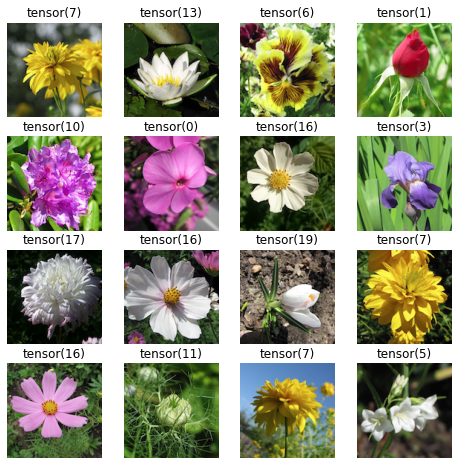

In [15]:
# 定义数据转换方法
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.ToTensor(),  # 将数据转换为张量
])

dataset = Flowers('./dataset/flower_color/flowers/flowers', transform = transform)

plot(dataset)

In [16]:
from torch.utils.data import Subset

In [17]:
dataset = Flowers('./dataset/flower_color/flowers/flowers', transform = transform)
subset = Subset(dataset, [i for i in range(16)])

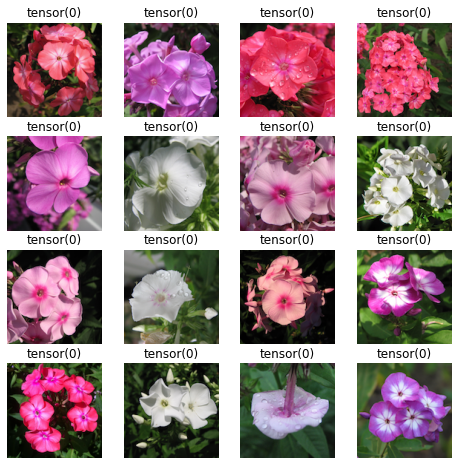

In [18]:
plot(subset, False)

### 自定义数据集2

In [19]:
%ls ./dataset/flower_color/flower_images/flower_images/

0001.png  0032.png  0063.png  0094.png  0125.png  0156.png  0187.png
0002.png  0033.png  0064.png  0095.png  0126.png  0157.png  0188.png
0003.png  0034.png  0065.png  0096.png  0127.png  0158.png  0189.png
0004.png  0035.png  0066.png  0097.png  0128.png  0159.png  0190.png
0005.png  0036.png  0067.png  0098.png  0129.png  0160.png  0191.png
0006.png  0037.png  0068.png  0099.png  0130.png  0161.png  0192.png
0007.png  0038.png  0069.png  0100.png  0131.png  0162.png  0193.png
0008.png  0039.png  0070.png  0101.png  0132.png  0163.png  0194.png
0009.png  0040.png  0071.png  0102.png  0133.png  0164.png  0195.png
0010.png  0041.png  0072.png  0103.png  0134.png  0165.png  0196.png
0011.png  0042.png  0073.png  0104.png  0135.png  0166.png  0197.png
0012.png  0043.png  0074.png  0105.png  0136.png  0167.png  0198.png
0013.png  0044.png  0075.png  0106.png  0137.png  0168.png  0199.png
0014.png  0045.png  0076.png  0107.png  0138.png  0169.png  0200.png
0015.png  0046.png  0077.png  0108

In [20]:
%cat ./dataset/flower_color/flower_images/flower_images/flower_labels.csv

file,label
0001.png,0
0002.png,0
0003.png,2
0004.png,0
0005.png,0
0006.png,1
0007.png,6
0008.png,0
0009.png,0
0010.png,0
0011.png,0
0012.png,0
0013.png,0
0014.png,7
0015.png,7
0016.png,1
0017.png,0
0018.png,0
0019.png,6
0020.png,0
0021.png,2
0022.png,4
0023.png,7
0024.png,4
0025.png,5
0026.png,6
0027.png,2
0028.png,5
0029.png,6
0030.png,6
0031.png,3
0032.png,6
0033.png,5
0034.png,0
0035.png,3
0036.png,8
0037.png,5
0038.png,9
0039.png,2
0040.png,8
0041.png,9
0042.png,1
0043.png,7
0044.png,3
0045.png,1
0046.png,4
0047.png,7
0048.png,3
0049.png,8
0050.png,1
0051.png,3
0052.png,4
0053.png,7
0054.png,9
0055.png,3
0056.png,6
0057.png,5
0058.png,8
0059.png,6
0060.png,8
0061.png,2
0062.png,1
0063.png,7
0064.png,8
0065.png,0
0066.png,5
0067.png,6
0068.png,3
0069.png,6
0070.png,4
0071.png,9
0072.png,7
0073.png,9
0074.png,1
0075.png,5
0076.png,3
0077.png,6
0078.png,6
0079.png,8
0080.png,3
0081.png,1
0082.png,4
0083.png,3
0084.png,9
0085.png,8
0086.png,5
0087.png,2
0088.png,4
0089.png,6
0090.png,4

In [21]:
import pandas as pd
csv = pd.read_csv('./dataset/flower_color/flower_images/flower_images/flower_labels.csv')

In [22]:
csv

,file,label
0,0001.png,0
1,0002.png,0
2,0003.png,2
3,0004.png,0
4,0005.png,0
...,...,...
205,0206.png,6
206,0207.png,0
207,0208.png,4
208,0209.png,6


In [23]:
csv.loc[csv.file == '0206.png', 'label'].iloc[0]

6

In [24]:
csv.iloc[:, 1].drop_duplicates().to_numpy()

array([0, 2, 1, 6, 7, 4, 5, 3, 8, 9])

In [25]:
class FlowersImages(Dataset):
    def __init__(self, data_dir, csv_file, transform = None):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        
        # 读取CSV文件
        csv = pd.read_csv(os.path.join(data_dir, csv_file))
        
        # 遍历数据目录下的所有PNG文件，并将其路径和标签添加到列表中
        for filename in sorted(os.listdir(data_dir)):
            if filename.endswith('.png'):
                self.image_paths.append(os.path.join(data_dir, filename))
                label = csv.loc[csv['file'] == filename, 'label'].iloc[0]
                self.labels.append(label)
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # 加载图像数据和标签
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        # 对图像数据进行转换
        if self.transform:
            image = self.transform(image)
        
        # 将标签转换为PyTorch张量
        label = torch.tensor(label, dtype=torch.long)
        
        return image, label

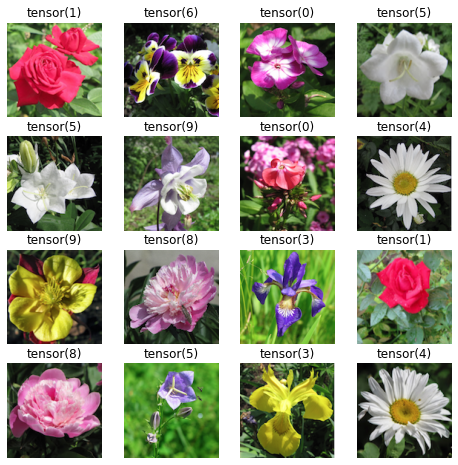

In [26]:
# 定义数据转换方法
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.ToTensor(),  # 将数据转换为张量
])

dataset = FlowersImages('./dataset/flower_color/flower_images/flower_images', 'flower_labels.csv', transform = transform)

plot(dataset)